## implementation of ANN using keras:

In [84]:
!pip install tensorflow

In [85]:
## import liberaries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [86]:
print(f"Tensorflow version {tf.__version__}")
print(f"Keras version {tf.__version__}")

Tensorflow version 2.14.0
Keras version 2.14.0


In [87]:
os.getcwd()

'/home/jovyan/work'

In [88]:
## get mnist datasets

In [89]:
mnist = tf.keras.datasets.mnist

In [90]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [91]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [92]:
(X_train_full , y_train_full) , (X_test,y_test) = mnist.load_data()

In [93]:
X_train_full , y_train_full

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [94]:
X_train_full.shape

(60000, 28, 28)

In [95]:
y_train_full[0].size

1

In [96]:
X_test.shape

(10000, 28, 28)

In [97]:
## validation and training data sets

X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]


## scale the test set as welll
X_test = X_test/255.0

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [163]:
len(X_train_full[:5000]) , len(X_train_full[5000:])

(5000, 55000)

In [164]:
## plot data points
## use imshow to print data into image

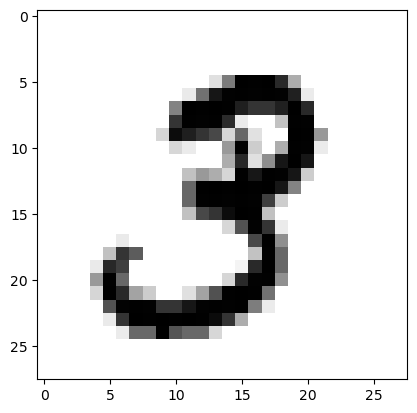

In [165]:
plt.imshow(X_train[1] , cmap='binary')
plt.show()

In [102]:
## plot heat mat to see the corelationship

<AxesSubplot: >

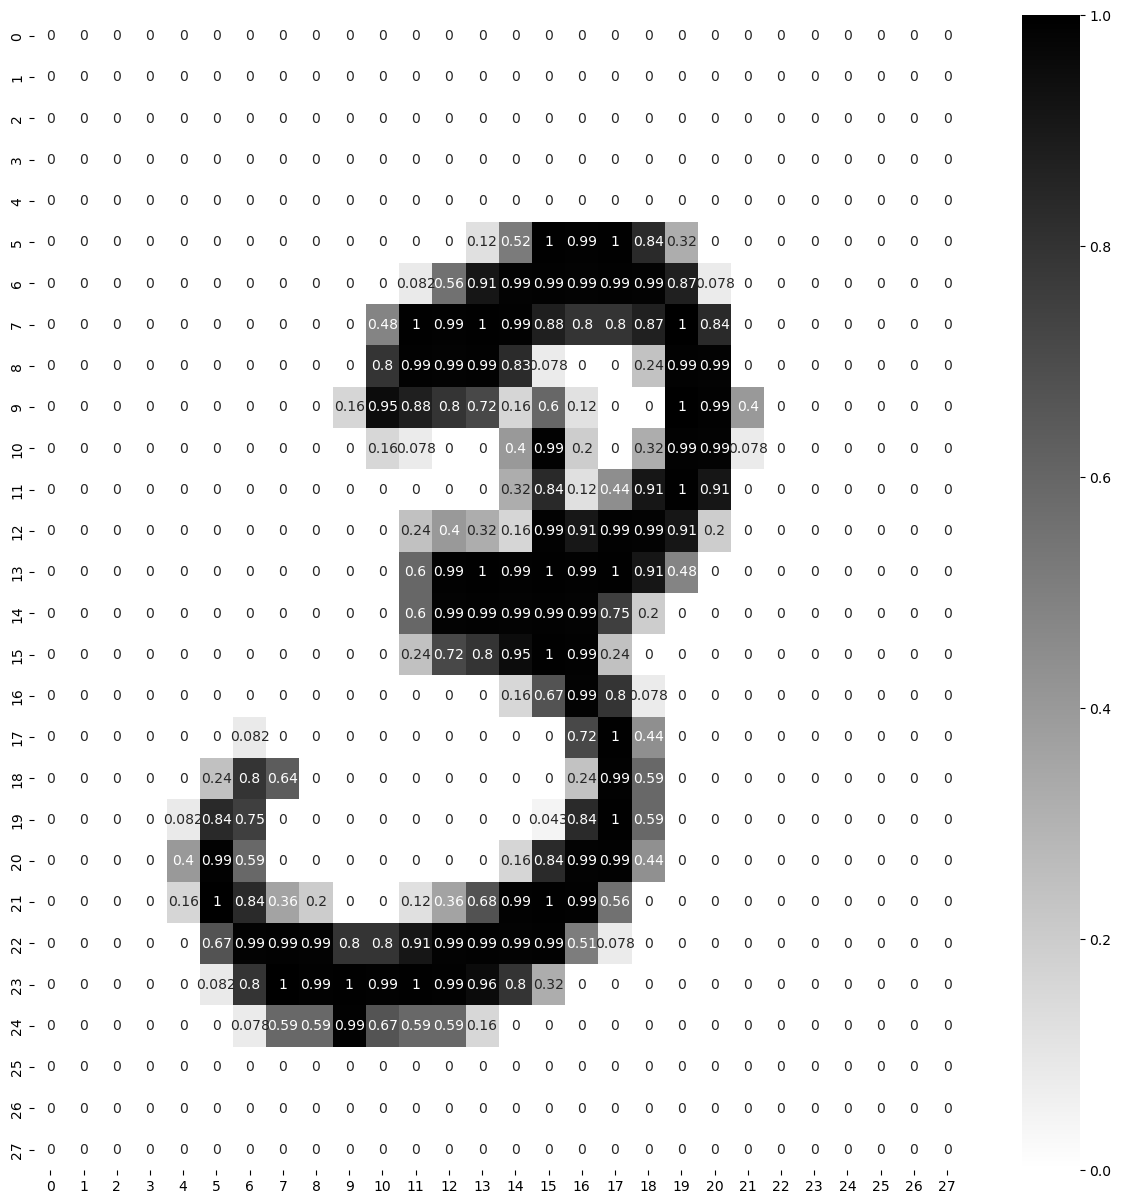

In [103]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1], annot=True , cmap='binary')

In [104]:
## creating layers of ANN

In [105]:
layers = [ tf.keras.layers.Flatten(input_shape=[28,28] , name = 'ImputLayer') ,
           tf.keras.layers.Dense(300 , activation='relu' , name='hiddenlayer1'),
           tf.keras.layers.Dense(100 , activation='relu' , name='hiddenlayer2'),
           tf.keras.layers.Dense(10 , activation='softmax' , name='outerlayer')]

model_clf = tf.keras.models.Sequential(layers)

In [106]:
layers

In [107]:
model_clf.layers

In [108]:
## Extract the summary
model_clf.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outerlayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
## total number of parameters

hiddenlayer1 = 785*300
hiddenlayer2 = 301 * 100
outputlayer = 101 * 10

In [110]:
hiddenlayer1,hiddenlayer2,outputlayer

(235500, 30100, 1010)

In [111]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [112]:
hidden1.get_weights()[0].shape

(784, 300)

In [113]:
hidden1.get_weights()[1].shape

(300,)

In [114]:
## weigts and bias

In [115]:
weights , bias = hidden1.get_weights()

In [116]:
weights.shape

(784, 300)

In [117]:
bias.shape

(300,)

In [118]:
print('shape\n' , weights.shape , '\n')
weights

shape
 (784, 300) 



array([[-0.02979562, -0.00899045,  0.01314443, ..., -0.03932211,
         0.01808167,  0.05789599],
       [ 0.04061963, -0.03112866, -0.02005273, ...,  0.06700595,
        -0.02559436, -0.04765367],
       [-0.04026404,  0.01585555, -0.0389472 , ...,  0.00711557,
        -0.05147703, -0.05500212],
       ...,
       [ 0.04352845, -0.07004235,  0.06084432, ...,  0.01162481,
        -0.04371084,  0.01921915],
       [-0.05778202,  0.01296367, -0.07305887, ..., -0.0046186 ,
         0.07122661, -0.05109419],
       [ 0.01697789, -0.06092158,  0.01430891, ..., -0.05236122,
         0.03947976,  0.00796527]], dtype=float32)

In [119]:
print('shape\n' , bias.shape , '\n')
bias

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [120]:
loss_function = tf.losses.sparse_categorical_crossentropy
optmizer = tf.keras.optimizers.SGD(0.02)

In [121]:
model_clf.compile(loss=loss_function,optimizer=optmizer,metrics='accuracy')

In [122]:
## model training

In [123]:
Epoches = 30
validation_dataset = X_valid,y_valid

history = model_clf.fit(X_train,y_train,epochs=30 , validation_data=validation_dataset,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4576 - accuracy: 0.8757 - val_loss: 0.2413 - val_accuracy: 0.9328
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2268 - accuracy: 0.9350 - val_loss: 0.1814 - val_accuracy: 0.9482
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1720 - accuracy: 0.9509 - val_loss: 0.1441 - val_accuracy: 0.9602
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9598 - val_loss: 0.1249 - val_accuracy: 0.9662
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1155 - accuracy: 0.9668 - val_loss: 0.1067 - val_accuracy: 0.9716
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9719 - val_loss: 0.0990 - val_accuracy: 0.9724
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9761 - val_loss: 0.0924 - val_accuracy:

In [124]:
data = pd.DataFrame(history.history)

In [125]:
data

,loss,accuracy,val_loss,val_accuracy
0,0.457621,0.875709,0.241295,0.9328
1,0.226838,0.934982,0.181395,0.9482
2,0.171987,0.950927,0.144087,0.9602
3,0.138696,0.959782,0.124873,0.9662
4,0.115485,0.966818,0.106736,0.9716
5,0.098294,0.971909,0.098959,0.9724
6,0.085086,0.976073,0.092401,0.9740
7,0.073759,0.979109,0.085438,0.9742
8,0.065054,0.981691,0.080153,0.9768
9,0.057624,0.983782,0.075794,0.9778


<AxesSubplot: >

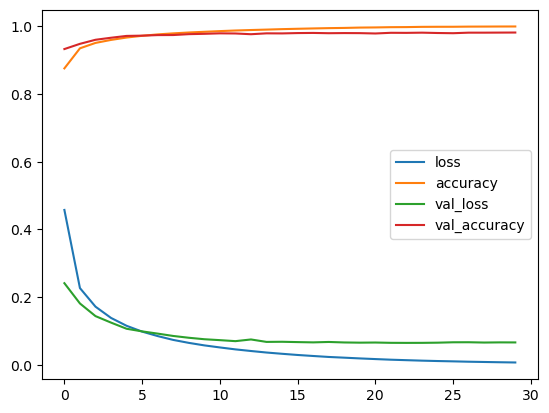

In [126]:
data.plot()

In [127]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9809


[0.06401755660772324, 0.98089998960495]

### Now check teh result

In [128]:
X_new = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [129]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot: >

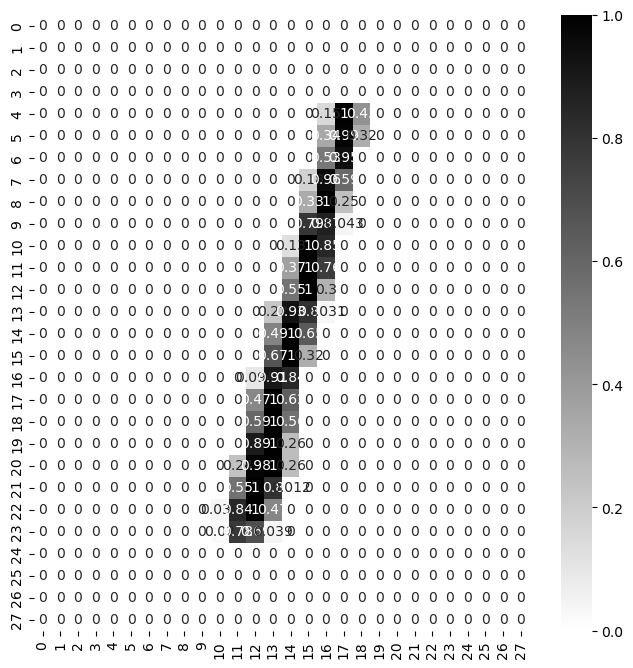

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2] , annot=True , cmap='binary')

In [131]:
## predict data points

In [132]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 68ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [133]:
y_prob

array([[1.76742196e-06, 1.69189306e-07, 3.51758245e-05, 1.32470668e-04,
        3.06240561e-10, 2.76383894e-08, 6.43932824e-13, 9.99813378e-01,
        2.63326774e-06, 1.44224250e-05],
       [4.40956249e-08, 1.88897680e-08, 9.99999642e-01, 3.16561852e-07,
        3.52419069e-15, 3.95833061e-10, 1.52069859e-08, 1.08222765e-14,
        3.51292186e-08, 2.62932291e-14],
       [7.72071303e-07, 9.99738038e-01, 4.10452885e-05, 1.68210727e-06,
        3.77072138e-05, 8.91504101e-07, 4.04141565e-06, 8.76595223e-05,
        8.77599814e-05, 3.98754764e-07]], dtype=float32)

In [134]:
y_pred = np.argmax(y_prob, axis=-1)

In [135]:
y_pred

array([7, 2, 1])

prediction and actuals are exect same


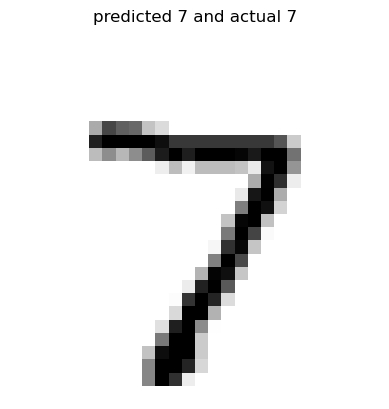

########################################


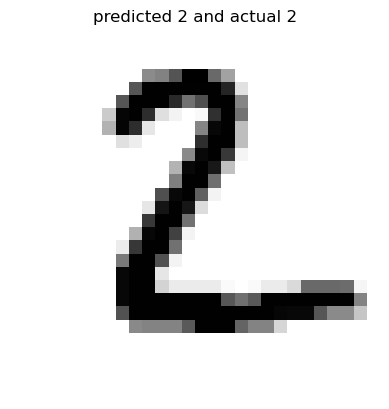

########################################


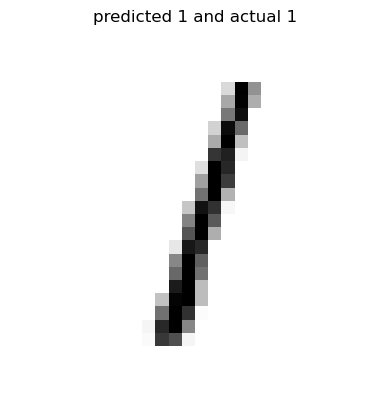

########################################


In [136]:
for data , pred , actual in zip(X_new,y_pred,actual):
    plt.imshow(data , cmap='binary')
    plt.title(f"predicted {pred} and actual {actual}")
    plt.axis('off')
    plt.show()
    print('########################################')

In [137]:
## Regularization technique

In [138]:
## method 2 dropout 

In [139]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers import Dropout
from tensorflow.keras import regularizers

In [140]:
model = Sequential()
model.add(Flatten(input_shape=[28,28] , name='inputlayer'))
model.add(Dense(units=64 , activation='relu', kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu' , kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [141]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 5265

In [142]:
loss_function = tf.losses.sparse_categorical_crossentropy
Optmizer = tf.keras.optimizers.SGD(0.02)
model.compile(loss = loss_function , optimizer=Optmizer , metrics='accuracy')

In [143]:
## training

In [144]:
Validation = (X_valid,y_valid)
history = model.fit(X_train,y_train,epochs=5 , validation_data=Validation , batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 5s 2ms/step - loss: 0.8360 - accuracy: 0.7458 - val_loss: 0.3229 - val_accuracy: 0.9174
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4346 - accuracy: 0.8777 - val_loss: 0.2481 - val_accuracy: 0.9382
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3634 - accuracy: 0.9005 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.9139 - val_loss: 0.1849 - val_accuracy: 0.9550
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2890 - accuracy: 0.9227 - val_loss: 0.1717 - val_accuracy: 0.9578


In [169]:
## weight initialisation

from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers import Dropout
from tensorflow.keras import regularizers

Model = Sequential()
Model.add(Flatten(input_shape=[28,28] , name='inputlayer'))
Model.add(Dense(units=64 , activation='relu', kernel_regularizer=tf.keras.initializers.GlorotNormal(seed=None)))
Model.add(Dropout(0.2))
Model.add(Dense(units=32 , activation='relu' , kernel_regularizer=tf.keras.initializers.GlorotNormal(seed=None)))
Model.add(Dropout(0.1))
Model.add(Dense(units=16 , activation='relu' , kernel_regularizer=tf.keras.initializers.GlorotNormal(seed=None)))
Model.add(Dropout(0.2))
Model.add(Dense(units=8 , activation='softmax'))

In [170]:
Model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dropout_30 (Dropout)        (None, 16)              

In [171]:
loss_function = tf.losses.sparse_categorical_crossentropy
Optmizer = tf.keras.optimizers.SGD(0.02)

Model.compile(loss= loss_function , optimizer=Optmizer , metrics='accuracy')

In [172]:
Validation = (X_valid,y_valid)
history = Model.fit(X_train_full, y_train_full, epochs=5 , validation_data=Validation , batch_size=32)

Epoch 1/5


TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1186, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1428, in losses
        loss_tensor = regularizer()
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1509, in _tag_callable
        loss = loss()
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 2836, in _loss_for_variable
        regularization = regularizer(v)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 647, in __call__
        return self._generate_init_val(shape=shape, dtype=dtype, nonce=nonce)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 651, in _generate_init_val
        fan_in, fan_out = _compute_fans(shape)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 1145, in _compute_fans
        if len(shape) < 1:  # Just to avoid errors for constants.

    TypeError: object of type 'ResourceVariable' has no len()


In [168]:
data = pd.DataFrame(history.history)

In [ ]:
data.plot()

In [ ]:
##Optimiers

model = Sequential()
model.add(Flatten(input_shape=[28,28] , name='inputlayer'))
model.add(Dense(units=64 , activation='relu', kernel_regularizer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu' , kernel_regularizer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu' , kernel_regularizer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [ ]:
model.summary()

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01 , beta_1=0.95)


model.compile(loss= 'sparse_categorical_crossentrophy' , optimizer=adam, metrics='accuracy')

In [ ]:
validation = (X_valid,y_valid)
history = model.fit(X_train,y_train, epochs=5 , validation_data=validation , batch_size=32)

In [153]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf  # Importing TensorFlow for the kernel_regularizer

Model = Sequential()
Model.add(Dropout(0.2))
Model.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.initializers.GlorotNormal(seed=None)))
Model.add(Dropout(0.1))
Model.add(Dense(units=16, activation='relu', kernel_regularizer=tf.keras.initializers.GlorotNormal(seed=None)))
Model.add(Dropout(0.2))
Model.add(Dense(units=10, activation='softmax'))

In [154]:
loss_function = tf.losses.sparse_categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
Model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
validation_data = (X_valid, y_valid)
history = Model.fit(X_train, y_train, epochs=5, validation_data=validation_data, batch_size=42)

Epoch 1/5


TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1186, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1428, in losses
        loss_tensor = regularizer()
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1509, in _tag_callable
        loss = loss()
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 2836, in _loss_for_variable
        regularization = regularizer(v)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 647, in __call__
        return self._generate_init_val(shape=shape, dtype=dtype, nonce=nonce)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 651, in _generate_init_val
        fan_in, fan_out = _compute_fans(shape)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py", line 1145, in _compute_fans
        if len(shape) < 1:  # Just to avoid errors for constants.

    TypeError: object of type 'UnliftedInitializerVariable' has no len()
